Classification of Handwritten digits images that represent single digit

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

MNIST

In [3]:
from keras.datasets import mnist

Using TensorFlow backend.


In [4]:
(X_train, y_train),(X_test,y_test) = mnist.load_data('D:/git/DeepLearning/CNN/dataset/mnist.npz')

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

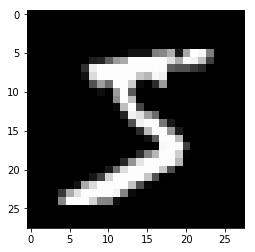

In [8]:
plt.imshow(X_train[0],cmap='gray')

In [9]:
#reshape to get 2d object array
X_train = X_train.reshape(-1,28*28)
X_test = X_test.reshape(-1,28*28)

In [10]:
X_train.shape

(60000, 784)

In [11]:
#converting values 0 to 255 to b/e 0 to 1 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

In [12]:
X_train[0]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [13]:
from keras.utils.np_utils import to_categorical

In [14]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [15]:
y_train[0]

5

In [16]:
# value 1 for the digit 5. others are 0
y_train_cat[0]

array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.])

In [17]:
#10 categories from digit 0-9
y_train_cat.shape

(60000, 10)

In [18]:
y_test_cat.shape

(10000, 10)

Fully connected model to classify images

In [19]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K

K.clear_session()

model = Sequential()
model.add(Dense(512,input_dim =28*28,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [20]:
h = model.fit(X_train,y_train_cat,batch_size=128,epochs=10,verbose=1,validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 20s 466us/step - loss: 0.3210 - acc: 0.9013 - val_loss: 0.1681 - val_acc: 0.9518
Epoch 2/10
42000/42000 [==============================] - 14s 326us/step - loss: 0.1100 - acc: 0.9667 - val_loss: 0.1153 - val_acc: 0.9662
Epoch 3/10
42000/42000 [==============================] - 13s 304us/step - loss: 0.0716 - acc: 0.9785 - val_loss: 0.1205 - val_acc: 0.9662
Epoch 4/10
42000/42000 [==============================] - 13s 311us/step - loss: 0.0534 - acc: 0.9835 - val_loss: 0.1132 - val_acc: 0.9682
Epoch 5/10
42000/42000 [==============================] - 13s 309us/step - loss: 0.0406 - acc: 0.9873 - val_loss: 0.1201 - val_acc: 0.9704
Epoch 6/10
42000/42000 [==============================] - 13s 303us/step - loss: 0.0309 - acc: 0.9902 - val_loss: 0.1107 - val_acc: 0.9757
Epoch 7/10
42000/42000 [==============================] - 13s 312us/step - loss: 0.0259 - acc: 0.9915 - val_loss: 0.

Text(0.5,0,'Epochs')

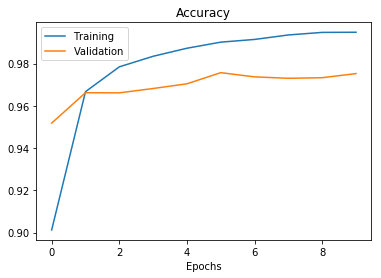

In [21]:
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.legend(['Training','Validation'])
plt.title('Accuracy')
plt.xlabel('Epochs')
#overfitting since train accuracy > validation accuracy

In [22]:
test_accuracy = model.evaluate(X_test,y_test_cat)[1]
test_accuracy

10000/10000 [==============================] - 4s 356us/step


0.97619999999999996